# Homework

    a) Use the Recursion method, Tabulation method,  and matrix method to calculate the time spent for different n (e.g. 1, 10, 100, 1000, 10000, … uniform in the log space). (caution: recursion method will break when n>100)

    b) plot log(time) (y-axis) vs. log(n) (x-axis) for different methods. 
       
    c) Discuss the complexity of each method.

    d) For graduate students who have projects: read the paper, and provide a short summary about your project

In [133]:
import matplotlib.pyplot as plt
import numpy as np
import time

# Recursion method fib

def fibo(n): 
    if n == 0: return 0
    elif n == 1: return 1
    else: return fibo(n-1) + fibo(n-2)


#calculate time in seconds
n1=np.arange(1,20,1)

t_1= np.zeros(n1.size)

for i in range(n1.size):
    start_time = time.time()
    fibn = fibo(n1[i])
    t_1[i] = time.time()-start_time
    print(t_1[i], "seconds")


8.106231689453125e-06 seconds
5.9604644775390625e-06 seconds
4.0531158447265625e-06 seconds
5.0067901611328125e-06 seconds
9.059906005859375e-06 seconds
1.2874603271484375e-05 seconds
2.09808349609375e-05 seconds
3.2901763916015625e-05 seconds
5.412101745605469e-05 seconds
8.606910705566406e-05 seconds
0.00020813941955566406 seconds
0.0003509521484375 seconds
0.00044798851013183594 seconds
0.0005786418914794922 seconds
0.0009663105010986328 seconds
0.001544952392578125 seconds
0.0030007362365722656 seconds
0.004909038543701172 seconds
0.0025548934936523438 seconds


In [134]:
# Tabulation method fib

def fibo2(n):
    table=[0]*(n+1)
    table[1] = 1
       
    for i in range(2,n+1):
        table[i]=table[i-1]+table[i-2]
        
    return table[n]

#calculate time in seconds
n2=np.arange(1,1000,100)
t_2 = np.zeros(n2.size)

for i in range(n2.size):
    start_time = time.time()
    fibn = fibo2(n2[i])
    t_2[i] = time.time()-start_time
    print(t_2[i], "seconds")

1.2636184692382812e-05 seconds
4.100799560546875e-05 seconds
6.389617919921875e-05 seconds
0.00011014938354492188 seconds
0.00014495849609375 seconds
0.00017690658569335938 seconds
0.00022101402282714844 seconds
0.0002560615539550781 seconds
0.0003361701965332031 seconds
0.0003418922424316406 seconds


In [135]:
#Matrix method fib

def arrpow(arr, n):
    yarr=arr
    if n<1:
        print('n needs to be larger than 1')
    if n==1:
        return arr
    yarr = arrpow(arr, n//2)
    yarr = [[yarr[0][0]*yarr[0][0]+yarr[0][1]*yarr[1][0],yarr[0][0]*yarr[0][1]+yarr[0][1]*yarr[1][1]],
            [yarr[1][0]*yarr[0][0]+yarr[1][1]*yarr[1][0],yarr[1][0]*yarr[0][1]+yarr[1][1]*yarr[1][1]]]
    if n%2:
        yarr=[[yarr[0][0]*arr[0][0]+yarr[0][1]*arr[1][0],yarr[0][0]*arr[0][1]+yarr[0][1]*arr[1][1]],
            [yarr[1][0]*arr[0][0]+yarr[1][1]*arr[1][0],yarr[1][0]*arr[0][1]+yarr[1][1]*arr[1][1]]]
    return yarr

def fibo3(n):
    arr= [[1,1],[1,0]]
    f=arrpow(arr,n-1)[0][0]
    return f


#calculate time in seconds
n3 = n2[1:]
t_3 = np.zeros(n3.size)

#calculate time in seconds
for i in range(n3.size):
    start_time = time.time()
    fibn = fibo3(n3[i])
    t_3[i] = time.time()-start_time
    print(t_3[i], "seconds")
    

4.410743713378906e-05 seconds
3.790855407714844e-05 seconds
3.814697265625e-05 seconds
3.600120544433594e-05 seconds
4.291534423828125e-05 seconds
5.888938903808594e-05 seconds
4.982948303222656e-05 seconds
4.1961669921875e-05 seconds
4.458427429199219e-05 seconds


Text(0, 0.5, ' ln(time) ')

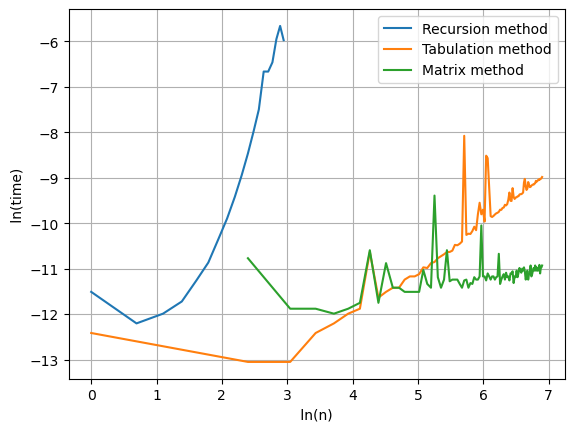

In [136]:
n1=np.arange(1,20,1)

t_1= np.zeros(n1.size)

for i in range(n1.size):
    start_time = time.time()
    fibn = fibo(n1[i])
    t_1[i] = time.time()-start_time
    

n2=np.arange(1,1000,10)
t_2 = np.zeros(n2.size)

for i in range(n2.size):
    start_time = time.time()
    fibn = fibo2(n2[i])
    t_2[i] = time.time()-start_time
    
n3 = n2[1:]
t_3 = np.zeros(n3.size)

for i in range(n3.size):
    start_time = time.time()
    fibn = fibo3(n3[i])
    t_3[i] = time.time()-start_time


plt.plot(np.log(n1), np.log(t_1), label = 'Recursion method')
plt.plot(np.log(n2), np.log(t_2), label = 'Tabulation method')
plt.plot(np.log(n3), np.log(t_3), label = 'Matrix method')
plt.grid()
plt.legend()
plt.xlabel(' ln(n) ')
plt.ylabel(' ln(time) ')

# Recursive Method ('fibo')

Time Complexity: O(2^n)

This method computes Fibonacci numbers by  implementing the definition. Each function call generates two additional calls, except for the base cases. This behavior results in an exponential growth in the total number of calls. Specifically, for each non-base case, the function splits into two new calls, each of which further divides, creating a rapidly expanding tree of function calls.

# Tabulation Method (Dynamic Programming  'fibo2'):

Time Complexity: O(n)

This method stores the Fibonacci numbers in a table (array) as they are computed. It avoids redundant calculations by storing previously computed values for future use.

# Matrix Exponentiation Method ('fibo3'):

Time Complexity: O(log(n))

This method is the most efficient for large n, this efficiency is  due to the technique of fast exponentiation. Fast exponentiation works by repeatedly squaring the matrix and halving the exponent, rather than performing the matrix multiplication n times.